# AS4 Programming
## Ayman Fahsi, A20440820
## CS577, Fall 2022

In [1]:
import tensorflow as tf
import numpy as np
from keras import models
from keras.models import load_model
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array, array_to_img

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical 


## Kaggle Cats and Dogs

### Base Model


In [ ]:
# build base model
base_kaggle = models.Sequential()
base_kaggle.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
base_kaggle.add(layers.MaxPooling2D((2, 2)))
base_kaggle.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_kaggle.add(layers.MaxPooling2D((2, 2)))
base_kaggle.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_kaggle.add(layers.MaxPooling2D((2, 2)))
base_kaggle.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_kaggle.add(layers.MaxPooling2D((2, 2)))
base_kaggle.add(layers.Flatten())
base_kaggle.add(layers.Dense(512, activation = 'relu'))
base_kaggle.add(layers.Dense(1, activation = 'sigmoid'))

base_kaggle.compile(loss='binary_crossentropy',
                    optimizer = optimizers.RMSprop(learning_rate=1e-4),
                    metrics = ['acc'])

# Generators
train = "/content/drive/MyDrive/PetImages/train"
val = "/content/drive/MyDrive/PetImages/val"
test = "/content/drive/MyDrive/PetImages/test"

train_d = ImageDataGenerator(rescale=1./255)
val_d = ImageDataGenerator(rescale=1./255)
test_d = ImageDataGenerator(rescale=1./255)

train_generator = train_d.flow_from_directory(train,
                                              target_size=(150,150),
                                              batch_size=20,
                                              class_mode="binary")
validation_generator = val_d.flow_from_directory(val,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode="binary")
test_generator = test_d.flow_from_directory(test,
                                            target_size=(150,150),
                                            batch_size=20,
                                            class_mode="binary")

# fit model
train_steps = train_generator.samples // train_generator.batch_size
val_steps = validation_generator.samples // validation_generator.batch_size
test_steps = test_generator.samples // test_generator.batch_size

# fit_generator is deprecated as fit accomodates generators 
base_history = base_kaggle.fit(
    train_generator,
    steps_per_epoch = train_steps,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = val_steps
)  

base_kaggle.save('base_cats_dogs.h5')

# Evaluate on test 
base_loss, base_acc = base_kaggle.evaluate(
    test_generator,
    steps=test_steps
)

Found 2600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/20
130/130 [==============================] - 1501s 11s/step - loss: 0.6842 - acc: 0.5508 - val_loss: 0.6653 - val_acc: 0.6133
Epoch 2/20
130/130 [==============================] - 14s 110ms/step - loss: 0.6420 - acc: 0.6185 - val_loss: 0.6229 - val_acc: 0.6317
Epoch 3/20
130/130 [==============================] - 14s 109ms/step - loss: 0.5852 - acc: 0.6900 - val_loss: 0.6328 - val_acc: 0.6200
Epoch 4/20
130/130 [==============================] - 14s 110ms/step - loss: 0.5516 - acc: 0.7154 - val_loss: 0.6049 - val_acc: 0.6783
Epoch 5/20
130/130 [==============================] - 14s 109ms/step - loss: 0.5187 - acc: 0.7400 - val_loss: 0.5580 - val_acc: 0.7117
Epoch 6/20
130/130 [==============================] - 14s 110ms/step - loss: 0.4877 - acc: 0.7665 - val_loss: 0.5509 - val_acc: 0.7200
Epoch 7/20
130/130 [==============================] - 14s 108ms/st

#### Plotting base model results

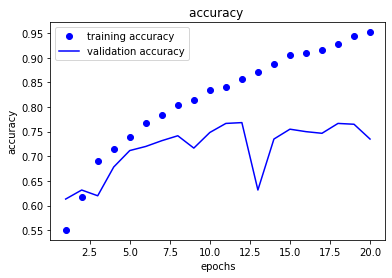

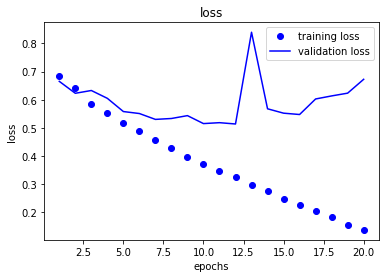

Test Accuracy :  77.24999785423279
Test Loss :  0.6006564497947693


In [ ]:
acc  = base_history.history['acc']
val_acc = base_history.history['val_acc']
loss = base_history.history['loss']
val_loss = base_history.history['val_loss']

epochs = range(1,len(loss)+1)
# Plot accuracy
plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.title('accuracy ')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(epochs,loss,'bo',label='training loss') 
plt.plot(epochs,val_loss,'b',label='validation loss') 
plt.title("loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# evaluate on test
print("Test Accuracy : ", base_acc * 100)
print("Test Loss : ", base_loss)

#### Visualize Activations

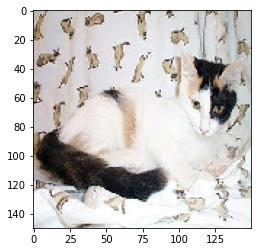

[<keras.layers.convolutional.conv2d.Conv2D object at 0x7fccda884b90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fccda884b50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fccda8aae50>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fcdc2a08110>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fccf226cd90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fccda899fd0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fccda834fd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fccda8aa810>, <keras.layers.reshaping.flatten.Flatten object at 0x7fccda845a50>, <keras.layers.core.dense.Dense object at 0x7fccda8aa890>, <keras.layers.core.dense.Dense object at 0x7fccda82f990>]
1/1 [==============================] - 0s 212ms/step


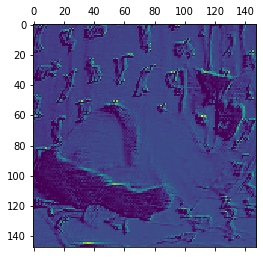

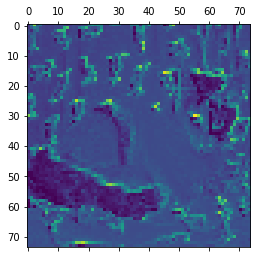

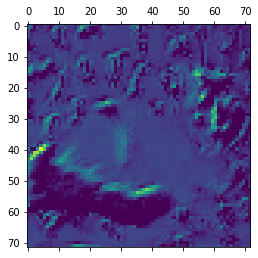

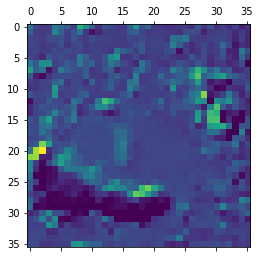

In [ ]:
# Load image and format into tensor
img_path = '/content/drive/MyDrive/PetImages/train/Cat/291.jpg'
img = load_img(img_path, target_size = (150,150))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255

# display base image
plt.imshow(img_tensor[0])
plt.show()

# load base model
base_model = load_model('base_cats_dogs.h5')
print(base_model.layers)
layer_outputs = []
for layer in base_model.layers[:8]:
    layer_outputs.append(layer.output)

# predict image results using new model
activation_model = models.Model(inputs=base_model.input, outputs= layer_outputs)
activations = activation_model.predict(img_tensor)

# display activations for first four layers
first_layer_activation = activations[0]
second_layer_activation = activations[1]
third_layer_activation = activations[2]
fourth_layer_activation = activations[3]

plt.matshow(first_layer_activation[0,:,:,4], cmap = 'viridis' )
plt.matshow(second_layer_activation[0,:,:,4], cmap = 'viridis' )
plt.matshow(third_layer_activation[0,:,:,4], cmap = 'viridis' )
plt.matshow(fourth_layer_activation[0,:,:,4], cmap = 'viridis' )



### Transfer Learning Models

#### Frozen model

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(
    weights ='imagenet',
    include_top = False,
    input_shape = (150,150,3)
)
# freeze the weights
conv_base.trainable = False

kaggle_frozen = models.Sequential()
kaggle_frozen.add(conv_base)
kaggle_frozen.add(layers.Flatten())
kaggle_frozen.add(layers.Dense(512, activation ='relu'))
kaggle_frozen.add(layers.Dense(1, activation ='sigmoid'))

kaggle_frozen.compile(loss = 'binary_crossentropy',
                      optimizer = optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc'])

frozen_history = kaggle_frozen.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=val_steps
)

kaggle_frozen.save('frozen_cats_dogs.h5')

frozen_loss, frozen_acc = kaggle_frozen.evaluate(
    test_generator,
    steps=test_steps
)

Epoch 1/20
130/130 [==============================] - 28s 211ms/step - loss: 2.2619 - acc: 0.8215 - val_loss: 0.6733 - val_acc: 0.5683
Epoch 2/20
130/130 [==============================] - 27s 211ms/step - loss: 1.3951 - acc: 0.8762 - val_loss: 0.7037 - val_acc: 0.5500
Epoch 3/20
130/130 [==============================] - 27s 210ms/step - loss: 1.0180 - acc: 0.8869 - val_loss: 0.7715 - val_acc: 0.5017
Epoch 4/20
130/130 [==============================] - 28s 215ms/step - loss: 0.7445 - acc: 0.8950 - val_loss: 0.6975 - val_acc: 0.5183
Epoch 5/20
130/130 [==============================] - 27s 210ms/step - loss: 0.5658 - acc: 0.9038 - val_loss: 0.6523 - val_acc: 0.5300
Epoch 6/20
130/130 [==============================] - 27s 210ms/step - loss: 0.4059 - acc: 0.9177 - val_loss: 0.6590 - val_acc: 0.5300
Epoch 7/20
130/130 [==============================] - 27s 208ms/step - loss: 0.3807 - acc: 0.9238 - val_loss: 0.6480 - val_acc: 0.5350
Epoch 8/20
130/130 [==============================] - 2

#### Plot frozen model results

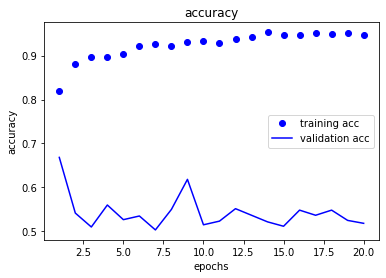

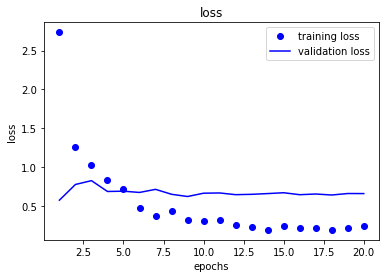

Test Accuracy :  51.499998569488525
Test Loss :  0.6561086177825928


In [ ]:
loss = frozen_history.history['loss']
val_loss = frozen_history.history['val_loss']
acc = frozen_history.history['acc']
val_acc = frozen_history.history['val_acc']

epochs = range(1, len(loss) + 1)
#plot accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# evaluate on test
print("Test Accuracy : ", frozen_acc * 100)
print("Test Loss : ", frozen_loss)

#### Unfrozen Model


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(
    weights ='imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

conv_base.trainable = True

kaggle_unfrozen = models.Sequential()
kaggle_unfrozen.add(conv_base)
kaggle_unfrozen.add(layers.Flatten())
kaggle_unfrozen.add(layers.Dense(512, activation ='relu'))
kaggle_unfrozen.add(layers.Dense(1, activation ='sigmoid'))

kaggle_unfrozen.compile(loss = 'binary_crossentropy',
                      optimizer = optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc'])

unfrozen_history = kaggle_unfrozen.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=val_steps
)

kaggle_unfrozen.save('unfrozen_cats_dogs.h5')

unfrozen_loss, unfrozen_acc = kaggle_unfrozen.evaluate(
    test_generator,
    steps=test_steps
)

Epoch 1/20
130/130 [==============================] - 30s 218ms/step - loss: 0.6516 - acc: 0.6369 - val_loss: 0.4188 - val_acc: 0.7983
Epoch 2/20
130/130 [==============================] - 30s 230ms/step - loss: 0.3693 - acc: 0.8381 - val_loss: 0.2475 - val_acc: 0.8883
Epoch 3/20
130/130 [==============================] - 26s 201ms/step - loss: 0.2612 - acc: 0.8962 - val_loss: 0.5058 - val_acc: 0.8817
Epoch 4/20
130/130 [==============================] - 26s 197ms/step - loss: 0.2060 - acc: 0.9231 - val_loss: 0.2404 - val_acc: 0.9100
Epoch 5/20
130/130 [==============================] - 29s 224ms/step - loss: 0.1452 - acc: 0.9512 - val_loss: 0.2361 - val_acc: 0.9000
Epoch 6/20
130/130 [==============================] - 29s 224ms/step - loss: 0.1366 - acc: 0.9596 - val_loss: 0.2923 - val_acc: 0.8967
Epoch 7/20
130/130 [==============================] - 27s 208ms/step - loss: 0.0894 - acc: 0.9650 - val_loss: 0.3362 - val_acc: 0.9067
Epoch 8/20
130/130 [==============================] - 2

#### Plot unfrozen model

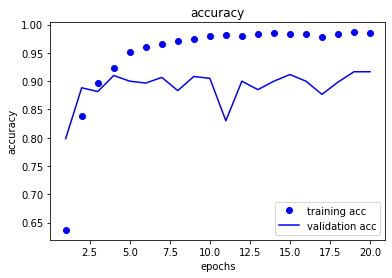

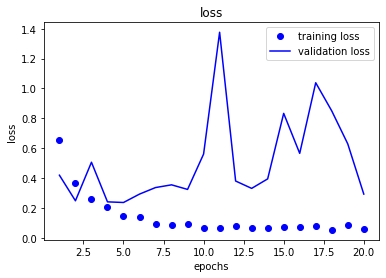

Test Accuracy :  93.25000047683716
Test Loss :  0.29432156682014465


In [ ]:
loss = unfrozen_history.history['loss']
val_loss = unfrozen_history.history['val_loss']
acc = unfrozen_history.history['acc']
val_acc = unfrozen_history.history['val_acc']

epochs = range(1, len(loss) + 1)
#plot accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# evaluate on test
print("Test Accuracy : ", unfrozen_acc * 100)
print("Test Loss : ", unfrozen_loss)

#### Data augmentation with frozen model

In [ ]:
from keras.applications import VGG16
  
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) 

conv_base = VGG16(
    weights ='imagenet',
    include_top = False,
    input_shape = (150,150,3)
)

# freeze the weights
conv_base.trainable = False

train_generator = train_datagen.flow_from_directory(train,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode="binary")
validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode="binary")
test_generator = test_datagen.flow_from_directory(test,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode="binary")

kaggle_aug = models.Sequential()
kaggle_aug.add(conv_base)
kaggle_aug.add(layers.Flatten())
kaggle_aug.add(layers.Dense(512, activation ='relu'))
kaggle_aug.add(layers.Dense(1, activation ='sigmoid'))

kaggle_aug.compile(loss = 'binary_crossentropy',
                      optimizer = optimizers.RMSprop(learning_rate=1e-4),
                      metrics=['acc'])

aug_history = kaggle_aug.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=val_steps
)

kaggle_aug.save('augmented_cats_dogs.h5')

aug_loss, aug_acc = kaggle_aug.evaluate(
    test_generator,
    steps=test_steps
)

Found 2600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/20
130/130 [==============================] - 28s 207ms/step - loss: 0.5402 - acc: 0.7331 - val_loss: 0.3926 - val_acc: 0.8067
Epoch 2/20
130/130 [==============================] - 27s 208ms/step - loss: 0.4287 - acc: 0.7988 - val_loss: 0.2692 - val_acc: 0.8783
Epoch 3/20
130/130 [==============================] - 26s 204ms/step - loss: 0.3845 - acc: 0.8246 - val_loss: 0.2548 - val_acc: 0.8833
Epoch 4/20
130/130 [==============================] - 27s 205ms/step - loss: 0.3661 - acc: 0.8408 - val_loss: 0.3216 - val_acc: 0.8567
Epoch 5/20
130/130 [==============================] - 27s 209ms/step - loss: 0.3433 - acc: 0.8538 - val_loss: 0.2553 - val_acc: 0.8917
Epoch 6/20
130/130 [==============================] - 27s 205ms/step - loss: 0.3453 - acc: 0.8462 - val_loss: 0.2902 - val_acc: 0.8850
Epoch 7/20
130/130 [==============================] - 28s 215ms/st

#### Plot augmented model

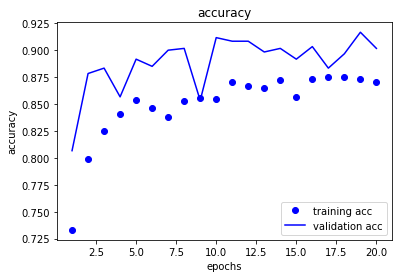

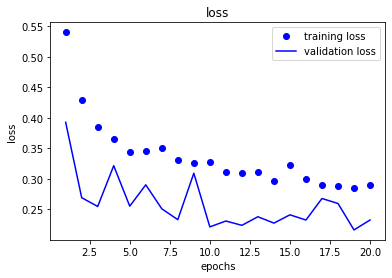

Test Accuracy :  90.37500023841858
Test Loss :  0.2514358460903168


In [ ]:
loss = aug_history.history['loss']
val_loss = aug_history.history['val_loss']
acc = aug_history.history['acc']
val_acc = aug_history.history['val_acc']

epochs = range(1, len(loss) + 1)
#plot accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# evaluate on test
print("Test Accuracy : ", aug_acc * 100)
print("Test Loss : ", aug_loss)

#### Load the dataset

In [24]:
import pickle
import numpy as np

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

y_train = []
x_train = []
flat_list = []

# extract training data
for i in range(1, 6):
    batch_i = unpickle('/content/drive/MyDrive/cifar-10-batches-py/data_batch_' + str(i))
    x_train.append(batch_i[b'data'])
    y_train.append(batch_i[b'labels'])
    # Flatten y_train
    # Unsure what caused this 
    for sublist in y_train:
        for item in sublist:
            flat_list.append(item)
y_train = flat_list

#extract test data
test_data = unpickle('/content/drive/MyDrive/cifar-10-batches-py/test_batch')
x_test = test_data[b'data']
y_test = test_data[b'labels']

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



# reshape into suitable tensors
x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))

# normalize data
x_train = x_train / 255.0
x_test - x_test / 255.0

# one hot encoding
y_train = to_categorical(y_train)
y_test= to_categorical(y_test)




#### Basic CNN

In [29]:
# build base model
base_cifar10 = models.Sequential()
base_cifar10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
base_cifar10.add(layers.MaxPooling2D((2, 2)))
base_cifar10.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_cifar10.add(layers.MaxPooling2D((2, 2)))
base_cifar10.add(layers.Conv2D(128, (3, 3), activation='relu'))
base_cifar10.add(layers.MaxPooling2D((2, 2)))
base_cifar10.add(layers.Flatten())
base_cifar10.add(layers.Dense(10, activation = 'softmax'))

# Compile model 
base_cifar10.compile(loss = 'categorical_crossentropy',
                     optimizer = 'adam',
                     metrics=['acc'])

# Fit the model
base_cifar_history = base_cifar10.fit(x_train, 
                                      y_train, 
                                      epochs=20, 
                                      batch_size=1000, 
                                      validation_split=0.2)

# Evaluate model
cifar_base_loss, cifar_base_acc = base_cifar10.evaluate(
    x_test, 
    y_test)

base_cifar10.save('base_cifar10.h5')

Epoch 1/20
40/40 [==============================] - 2s 46ms/step - loss: 2.2994 - acc: 0.1191 - val_loss: 2.3099 - val_acc: 0.0989
Epoch 2/20
40/40 [==============================] - 1s 34ms/step - loss: 2.2831 - acc: 0.1431 - val_loss: 2.3217 - val_acc: 0.0991
Epoch 3/20
40/40 [==============================] - 1s 33ms/step - loss: 2.2736 - acc: 0.1569 - val_loss: 2.3296 - val_acc: 0.1009
Epoch 4/20
40/40 [==============================] - 1s 34ms/step - loss: 2.2662 - acc: 0.1692 - val_loss: 2.3336 - val_acc: 0.1011
Epoch 5/20
40/40 [==============================] - 1s 34ms/step - loss: 2.2610 - acc: 0.1726 - val_loss: 2.3440 - val_acc: 0.1000
Epoch 6/20
40/40 [==============================] - 1s 33ms/step - loss: 2.2538 - acc: 0.1808 - val_loss: 2.3340 - val_acc: 0.0973
Epoch 7/20
40/40 [==============================] - 1s 34ms/step - loss: 2.2492 - acc: 0.1847 - val_loss: 2.3457 - val_acc: 0.1007
Epoch 8/20
40/40 [==============================] - 1s 34ms/step - loss: 2.2408 - a

#### Plot Base Model

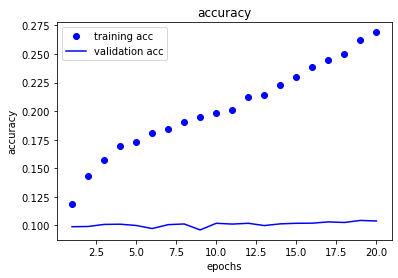

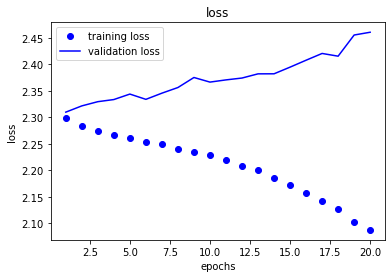

Test Accuracy :  34.56999957561493
Test Loss :  103.40018463134766


In [31]:
loss = base_cifar_history.history['loss']
val_loss = base_cifar_history.history['val_loss']
acc = base_cifar_history.history['acc']
val_acc = base_cifar_history.history['val_acc']

epochs = range(1, len(loss) + 1)
#plot accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plot loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# evaluate on test
print("Test Accuracy : ", cifar_base_acc * 100)
print("Test Loss : ", cifar_base_loss)

#### Inception model

#### Residual Model